In [6]:
import seaborn as sns
import pandas
import gripql
conn = gripql.Connection("https://bmeg.io/api", credential_file="/tmp/bmeg_credentials.json")
O = conn.graph("bmeg_rc1_2")

## Download gene expression values from TCGA-READ cohort and build matrix with submitter id as label

In [2]:
c = O.query().V("Project:TCGA-READ").in_("InProject").in_("SampleFor").as_("sample")
c = c.in_("AliquotFor").in_("GeneExpressionOf").as_("exp")
c = c.render( ["$sample._data.gdc_attributes.submitter_id", "$exp._data.values"])
data = {}
for row in c.execute(stream=True):
    data[row[0]] = row[1]
samples = pandas.DataFrame(data).transpose().fillna(0.0)

[INFO]	2019-03-11 16:34:51,885	177 results received in 79 seconds


In [5]:
samples["ENSG00000000003"].sort_values(ascending=False).head()

TCGA-DC-5869-01A    273.06691
TCGA-AF-3913-01A    247.02666
TCGA-EF-5831-01A    245.57436
TCGA-DC-6683-01A    243.55564
TCGA-DC-5337-01A    240.26590
Name: ENSG00000000003, dtype: float64

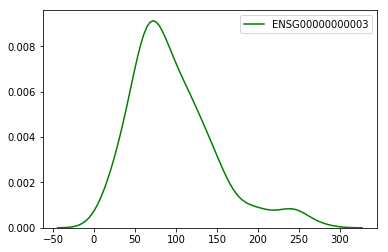

In [8]:
sns.kdeplot(samples['ENSG00000000003'], color="g")